In [6]:
from fastai.vision.all import *

In [7]:
from pathlib import Path

In [13]:
path = Path("data")

In [22]:
test_files = get_image_files(path / "test")

In [15]:
dls = ImageDataLoaders.from_folder(path, valid="test")

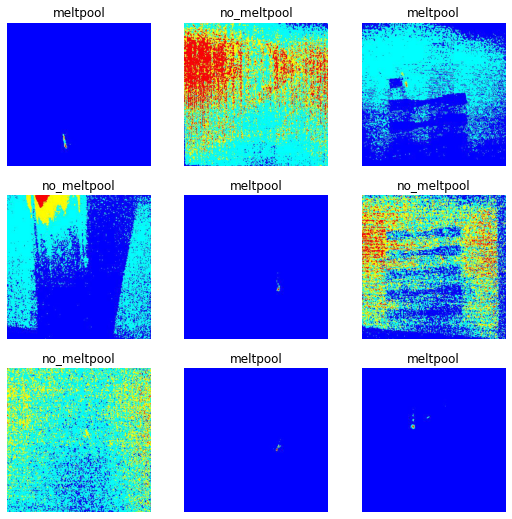

In [18]:
dls.show_batch()

In [19]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /jet/home/azonca/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.366736,0.350958,0.108684,02:30


epoch,train_loss,valid_loss,error_rate,time
0,0.144879,0.227803,0.044202,00:45


SuggestedLRs(valley=4.786300905834651e-06)

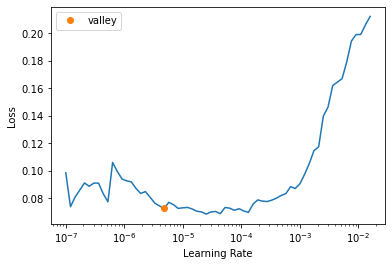

In [23]:
learn.lr_find()

In [24]:
learn.fine_tune(2, 4.786300905834651e-06)

epoch,train_loss,valid_loss,error_rate,time
0,0.084451,0.234924,0.045762,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.076333,0.220648,0.043682,00:45
1,0.082856,0.229237,0.044202,00:45


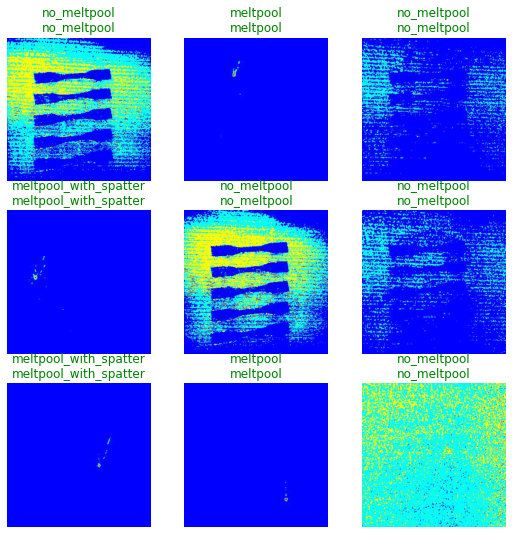

In [51]:
learn.show_results()

In [26]:
interp = Interpretation.from_learner(learn)

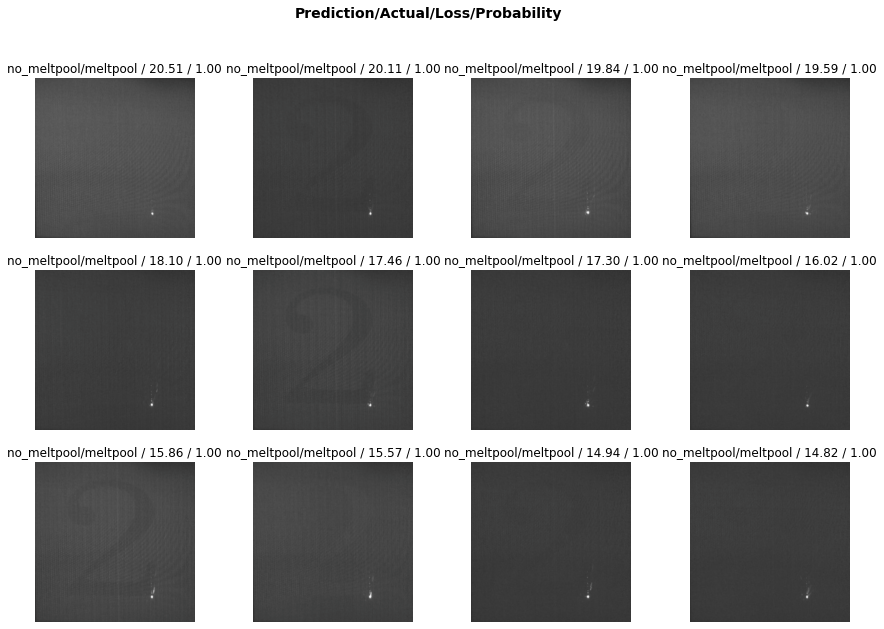

In [28]:
interp.plot_top_losses(12, figsize=(15,10))

In [47]:
top_losses_indices = interp.top_losses(12)[1]

In [49]:
list(top_losses_indices)

[TensorBase(744),
 TensorBase(266),
 TensorBase(815),
 TensorBase(256),
 TensorBase(930),
 TensorBase(54),
 TensorBase(129),
 TensorBase(189),
 TensorBase(183),
 TensorBase(867),
 TensorBase(829),
 TensorBase(965)]

In [50]:
for each in top_losses_indices:
    print(dls.valid_ds.items[each])

data/test/meltpool/82.jpg
data/test/meltpool/83.jpg
data/test/meltpool/99.jpg
data/test/meltpool/86.jpg
data/test/meltpool/98.jpg
data/test/meltpool/87.jpg
data/test/meltpool/88.jpg
data/test/meltpool/84.jpg
data/test/meltpool/95.jpg
data/test/meltpool/94.jpg
data/test/meltpool/96.jpg
data/test/meltpool/92.jpg
